# Problem set 6
I kind of ran out of time when doing the LIGO questions (I do not expect they would take that long) so there are some questions that are missing some comments/explanations.
## Question 1

Shifting an array using a convolution. We can shift a function $f(x)$ by taking its Fourier transform, $F(k)$, multiplying it by $e^{2\pi ik\delta/N}$, where $\delta$ is the shift, then taking the inverse Fourier transform to get back $f(x+\delta)$.

In [4]:
# importing stuff
import numpy as np
import matplotlib.pyplot as plt
import h5py
from scipy import signal

plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rcParams['figure.dpi'] = 100

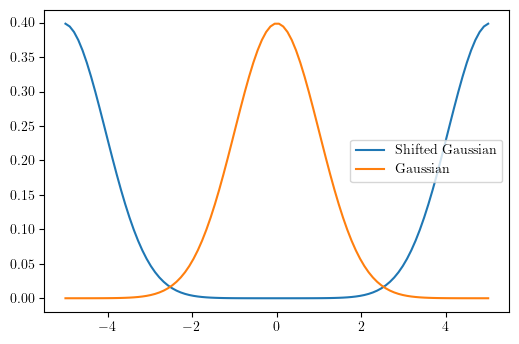

In [5]:

x=np.linspace(-5,5,100)
k=np.arange(x.size)

def gaussian(x,mu,sigma):
    return np.exp(-(x-mu)**2/(2*sigma**2))/(np.sqrt(2*np.pi*sigma))

# center the gaussian at the middle of the x-array (that is x=5)
fun=gaussian(x,0,1) #  arbitrary sigma 

def shifting(fun,shift_size):
    ''' Function that shifts some function 'fun' by some amount 'shift_size'. Returns the shifted function.'''
    fft=np.fft.fft(fun)
    shift=np.exp((-2*np.pi*1j*k*shift_size)/np.size(fun))
    return np.real(np.fft.ifft(shift*fft))

fun_shifted=shifting(fun,x.size/2)
plt.plot(x,fun_shifted,label='Shifted Gaussian')
plt.plot(x,fun,label='Gaussian')
plt.legend()
plt.show()

## Question 2
The correlation function of two functions $f$ and $g$ using ffts is $f*g=F^{-1}(F(f)conj(F(g)))$

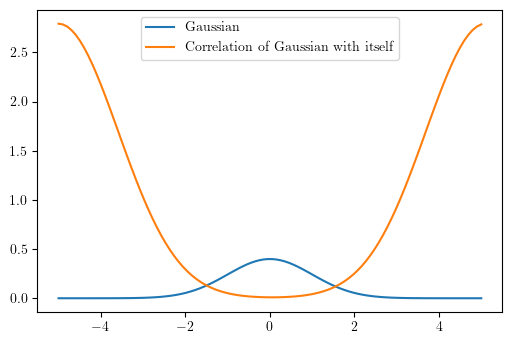

In [6]:
# a)
def correlation_function(fun1,fun2):
    '''function that returns the correlation function of two arrays 'fun1' and 'fun2'.'''
    fft1=np.fft.fft(fun1)
    fft2=np.fft.fft(fun2)
    return np.real(np.fft.ifft(fft1*np.conjugate(fft2)))

# take the correlation of the same Gaussian with itself!
fun=gaussian(x,0,1)
corr=correlation_function(fun,fun)

plt.plot(x,fun,label='Gaussian')
plt.plot(x,corr,label='Correlation of Gaussian with itself')
plt.legend()
plt.show()

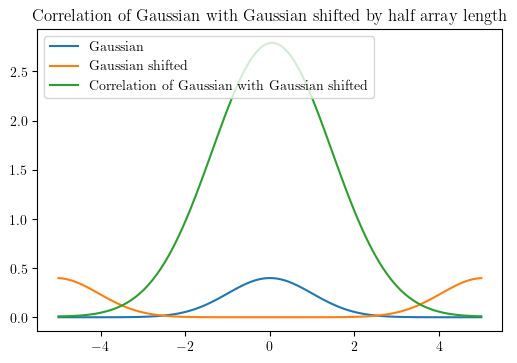

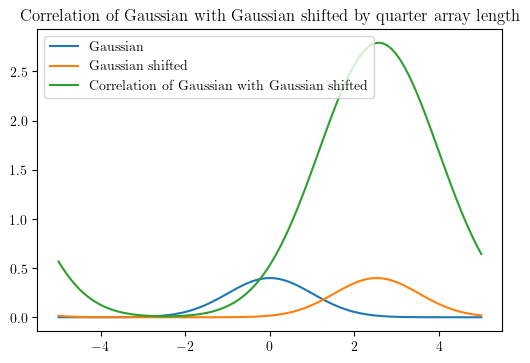

In [7]:
# b)
# correlation function of a Gaussian (shifted) with itself
fun=gaussian(x,0,1)
fun_shifted1=shifting(fun,x.size/2);fun_shifted2=shifting(fun,x.size/4)
corr1=correlation_function(fun,fun_shifted1);corr2=correlation_function(fun,fun_shifted2)
plt.plot(x,fun,label='Gaussian')
plt.plot(x,fun_shifted1,label='Gaussian shifted')
plt.plot(x,corr1,label='Correlation of Gaussian with Gaussian shifted')
plt.title('Correlation of Gaussian with Gaussian shifted by half array length')
plt.legend(loc='upper left')
plt.show()  
plt.plot(x,fun,label='Gaussian')
plt.plot(x,fun_shifted2,label='Gaussian shifted')
plt.plot(x,corr2,label='Correlation of Gaussian with Gaussian shifted')
plt.title('Correlation of Gaussian with Gaussian shifted by quarter array length')
plt.legend(loc='upper left')
plt.show()  

Seems like the correlation function does not change shape when the shift is different, but its center is moving as we change the shift!

## Question 3

To avoid wrap around, we can make the arrays the same size and add zeroes at the end of the input arrays so that at least half of the arrays are zero (this is called zero-padding).

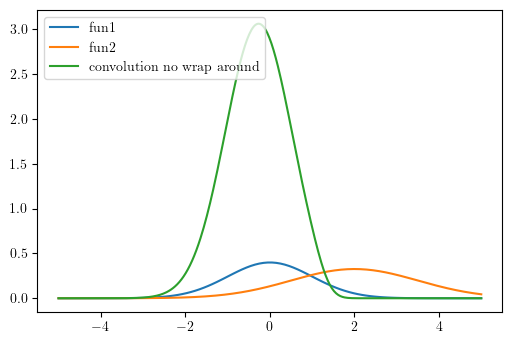

In [8]:
x1=np.linspace(-5,5,100)
x2=np.linspace(-5,5,200)

fun1=gaussian(x1,0,1)
fun2=gaussian(x2,2,1.5)

def convolution(fun1,fun2):
    if np.size(fun1)<=np.size(fun2):
        fun1_new=np.zeros(2*np.size(fun2))
        fun1_new[:np.size(fun1)]=fun1
        fun2_new=np.zeros(2*np.size(fun2))
        fun2_new[:np.size(fun2)]=fun2
    else:
        fun1_new=np.zeros(2*np.size(fun1))
        fun1_new[:np.size(fun1)]=fun1
        fun2_new=np.zeros(2*np.size(fun1))
        fun2_new[:np.size(fun2)]=fun2

    fft1=np.fft.fft(fun1_new)
    fft2=np.fft.fft(fun2_new)
    return np.real(np.fft.ifft(fft1*(fft2)))

# function doubles the lenght of the biggest input array
n=np.max([2*np.size(x1),2*np.size(x2)])
xn=np.linspace(-5,5,n)

plt.plot(x1,fun1,label='fun1')
plt.plot(x2,fun2,label='fun2')
plt.plot(xn,convolution(fun1,fun2),label='convolution no wrap around')
plt.legend(loc='upper left')
plt.show()    

## Question 4
## a)

$$ \sum_{x=0}^{N-1}\exp{(-2\pi ikx/N)}=\sum_{x=0}^{N-1}\alpha^x,$$

where $\alpha=\exp{(-2\pi ik/N)}$. This is just a sum of geometric series, for which we know the value of the sum of the first n terms. It is:

$$\sum_{k=0}^{n-1}ar^k=a\left(\frac{1-r^n}{1-r}\right).$$

So in our case, we have

$$\sum_{x=0}^{N-1}\alpha^x=\frac{1-\alpha^N}{1-\alpha}=\frac{1-\exp{(-2\pi ik)}}{1-\exp{(-2\pi ik/N)}},$$

which is what we wanted to show.

## b) 

First let's show that the sum approaches $N$ when $k\to 0$.

$$\lim_{k\to 0} \frac{1-\exp{(-2\pi ik)}}{1-\exp{(-2\pi ik/N)}} = \frac{1-1}{1-1} =\frac{0}{0}.$$

Undefined! Let's use L'Hopital's rule, so take the derivative w.r.t to $k$ of the numerator and the denominator. We get

$$\lim_{k\to 0} \frac{-2\pi i\exp{(-2\pi ik)}}{-2\pi i/N\exp{(-2\pi ik/N)}},$$

$$=\frac{1}{1/N},$$

$$=N.$$

Now let's show that the sum is non-zero if and only if $k$ is a multiple of $N$. I'll do this using the computer, plotting the sum for a few $k$'s.

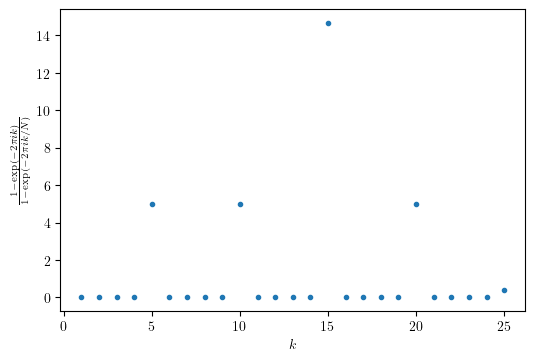

In [9]:
def sum(k,N):
    return np.real((1-np.exp(-2*np.pi*1j*k))/(1-np.exp(-2*np.pi*1j*k/N)))

# arbritrary N
N=5
k=np.linspace(1,N**2,N**2)
plt.plot(k,sum(k,N),'.')
plt.ylabel('$\\frac{1-\exp{(-2\pi ik)}}{1-\exp{(-2\pi ik/N)}}$')
plt.xlabel('$k$')
plt.show()


Here, $N=5$. Clearly, the only non-zero values of the sum are those where $k$ is a multiple of 5 (so a multiple of $N$).

## c)

Let $f(x)=\sin{(-2\pi zx/N)}$, where $z$ is not an integer.

The discrete Fourier transform for a function $f(x)$ is:
$$F(k)=\sum_{x=0}^{N-1}f(x)\exp{(-2\pi ikx/N )}$$

For the sine wave, that is

$$F(k)=\sum_{x=0}^{N-1}\sin{(-2\pi zx/N)}\exp{(-2\pi ikx/N )}.$$

Use the representation of sine in complex exponentials:
$$F(k)=\sum_{x=0}^{N-1}\left(\frac{\exp{(-2\pi izx/N )}-\exp{(2\pi izx/N )}}{2i}\right)\exp{(-2\pi ikx/N )},$$
$$F(k)=\sum_{x=0}^{N-1}\left(\frac{\exp{(-2\pi i(z+k)x/N )}-\exp{(2\pi i(z-k)x/N )}}{2i}\right),$$



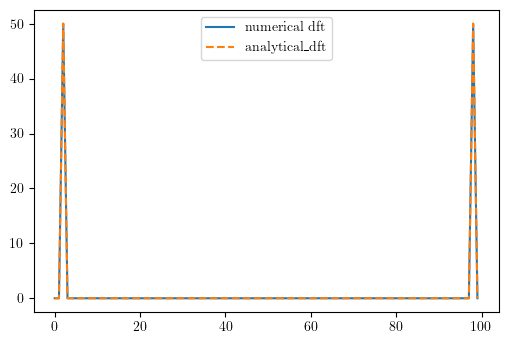

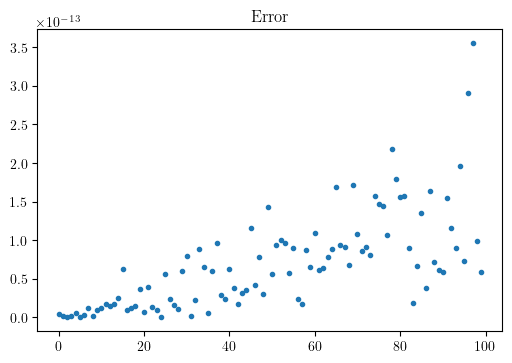

In [10]:
def analytical(z,N,k):
    k=np.arange(N)
    dft=[]
    for i in k:
        dft.append(np.sum(np.exp(-2j*np.pi*(z+i)*x/N)-np.exp(2j*np.pi*(z-i)*x/N))/(2j))
    return np.array(dft)

N=100
x=np.arange(N)
k=np.arange(N)
# start with integer z
z=2

numerical_dft=np.abs(np.fft.fft(np.sin(-2*np.pi*z*x/N)))
analytical_dft = np.abs(analytical(z,N,k))

plt.plot(k,numerical_dft,label='numerical dft')
plt.plot(k,analytical_dft,'--',label='analytical_dft')
plt.legend()
plt.show()

# errors
err=np.abs(numerical_dft-analytical_dft)
plt.plot(k,err,'.')
plt.title('Error')
plt.show()

The two DFTs agree really really well! The error is on the order of 1e-13, which is really good. We two delta function-like peaks, which is what we should get, but the peaks are not narrow enough to be a real delta function. Now let's repeat this but with a non-integer $z$.

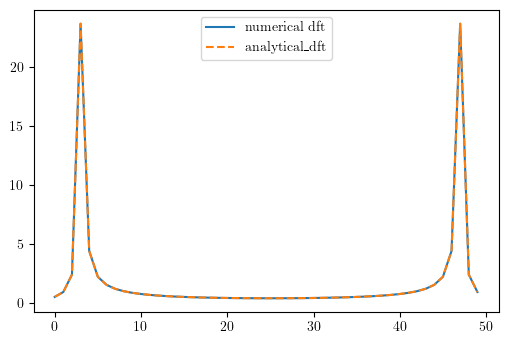

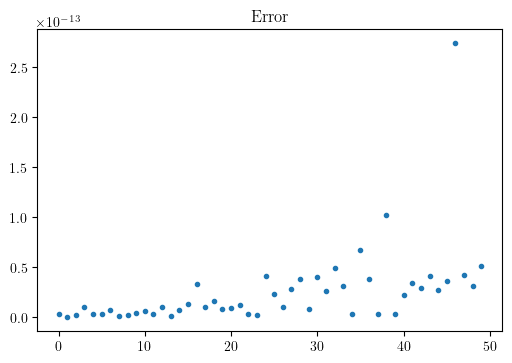

In [11]:
N=50
x=np.arange(N)
k=np.arange(N)
# start with integer z
z=np.pi

numerical_dft=np.abs(np.fft.fft(np.sin(-2*np.pi*z*x/N)))
analytical_dft = np.abs(analytical(z,N,k))

plt.plot(k,numerical_dft,label='numerical dft')
plt.plot(k,analytical_dft,'--',label='analytical_dft')
plt.legend()
plt.show()

# errors
err=np.abs(numerical_dft-analytical_dft)
plt.plot(k,err,'.')
plt.title('Error')
plt.show()

Sensibly the same thing, but the 'delta function' peaks are now even broader. This is due to spectral leakage.

Let's *try* to improve the result at the edges with window functions.

## d)

Use $g(x)=0.5-0.5\cos{(2\pi x/N)}$ as a simple window.

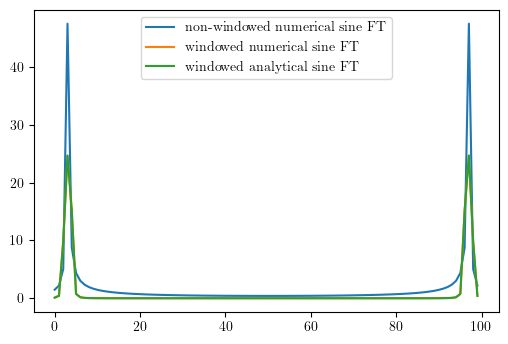

In [12]:
def window_function(x,N):
    return 0.5-0.5*np.cos(2*np.pi*x/N) 

N=100
x=np.arange(N)
k=np.arange(N)
z=np.pi

sine=np.sin(-2*np.pi*z*x/N)
sine_ft=np.abs(np.fft.fft(sine))
windowed_sine_ft=np.abs(np.fft.fft(sine*window_function(x,N)))
win=np.abs(np.fft.fft(np.fft.ifft(analytical(z,N,k))*window_function(x,N)))

plt.plot(k,sine_ft,label='non-windowed numerical sine FT')
plt.plot(k,windowed_sine_ft,label='windowed numerical sine FT')
plt.plot(k,win,label='windowed analytical sine FT')
plt.legend()
plt.show()

Honestly, I can't tell if the spectral leakage got better with the window function. the new peaks aren't exactly narrower.

## e)

Let's show numerically that the FT of the window is $[N/2,N/4,0,...,0,N/4]$.

In [13]:
N=50
x=np.arange(N)
k=np.arange(N)
z=1

ft_window=np.abs(np.fft.fft(window_function(x,N)))
print('For N=',N)
print('First element is:', ft_window[0], 'second element is:',ft_window[1], 'third element is:', ft_window[2],
'second to last element is:', ft_window[-2], 'last element is: ',ft_window[-1])
N=100
x=np.arange(N)
k=np.arange(N)
z=1

ft_window=np.abs(np.fft.fft(window_function(x,N)))
print('For N=',N)
print('First element is:', ft_window[0], 'second element is:',ft_window[1], 'third element is:', ft_window[2],
'second to last element is:', ft_window[-2], 'last element is: ',ft_window[-1])
N=1000
x=np.arange(N)
k=np.arange(N)
z=1

ft_window=np.abs(np.fft.fft(window_function(x,N)))
print('For N=',N)
print('First element is:', ft_window[0], 'second element is:',ft_window[1], 'third element is:', ft_window[2],
'second to last element is:', ft_window[-2], 'last element is: ',ft_window[-1])

For N= 50
First element is: 25.0 second element is: 12.5 third element is: 1.1368811888265095e-15 second to last element is: 1.1368811888265093e-15 last element is:  12.499999999999998
For N= 100
First element is: 50.0 second element is: 25.0 third element is: 1.322083763812866e-15 second to last element is: 1.3220837638128664e-15 last element is:  25.0
For N= 1000
First element is: 500.0 second element is: 250.0 third element is: 7.69606137794719e-15 second to last element is: 7.696061377947192e-15 last element is:  250.0


Indeed, the FT of the window is $[N/2,N/4,0,...,0,N/4]$!

## Question 5: LIGO

In [70]:
# where the LIGO data is on my computer
folderpath = 'C:/Users/Greg/Desktop/PHYS-512-Sievers/Problem set 6/losc-event'
os.chdir(folderpath)

# code to read the LIGO data
# taken from Jon's simple_read_ligo.py
def read_template(filename):
    dataFile=h5py.File(filename,'r')
    template=dataFile['template']
    tp=template[0]
    tx=template[1]
    return tp,tx
def read_file(filename):
    dataFile=h5py.File(filename,'r')
    dqInfo = dataFile['quality']['simple']
    qmask=dqInfo['DQmask'][...]

    meta=dataFile['meta']
    #gpsStart=meta['GPSstart'].value
    gpsStart=meta['GPSstart'][()]
    #print meta.keys()
    #utc=meta['UTCstart'].value
    utc=meta['UTCstart'][()]
    #duration=meta['Duration'].value
    duration=meta['Duration'][()]
    #strain=dataFile['strain']['Strain'].value
    strain=dataFile['strain']['Strain'][()]
    dt=(1.0*duration)/len(strain)

    dataFile.close()
    return strain,dt,utc

# getting the data for Hanford and Livingston events with their associated template
hanford=['H-H1_LOSC_4_V2-1126259446-32.hdf5','H-H1_LOSC_4_V2-1135136334-32.hdf5','H-H1_LOSC_4_V1-1167559920-32.hdf5','H-H1_LOSC_4_V2-1128678884-32.hdf5']
livingston=['L-L1_LOSC_4_V2-1126259446-32.hdf5','L-L1_LOSC_4_V2-1135136334-32.hdf5','L-L1_LOSC_4_V1-1167559920-32.hdf5','L-L1_LOSC_4_V2-1128678884-32.hdf5']
template_name=['GW150914_4_template.hdf5','GW151226_4_template.hdf5','GW170104_4_template.hdf5','LVT151012_4_template.hdf5']
template_title=['GW150914','GW151226','GW170104','LVT151012']
signal_h=[];signal_l=[];template_h=[];template_l=[];dt_h=[];dt_l=[]
for i in range(4):
    h1=read_file(hanford[i])[0];h2=read_file(hanford[i])[1]
    signal_h.append(h1)
    dt_h.append(h2)
    l1=read_file(livingston[i])[0];l2=read_file(livingston[i])[1]
    signal_l.append(l1)
    dt_l.append(l2)
    th,tl=read_template(template_name[i])
    template_h.append(th);template_l.append(tl)

## a)

First, I choose a flatened cosine as a window function. This, as well as what values to feed the ```signal.windows.cosine()``` are kind of arbitrary. I settled for those in the code because they gave sensible results.

The noise model I decided to take the square of the windowed power spectrum, which I smoothed out by convolving it with an array of entries equal to 1/100. 

Then I delt with the lines on the smoothed, windowed power spectrum and the windowed template by dividing them by the square root of the noise.

Below are the plots for the smoothed out noise and the windowed + whitened templates for both the Hanford and the Livingston detectors, for all 4 events

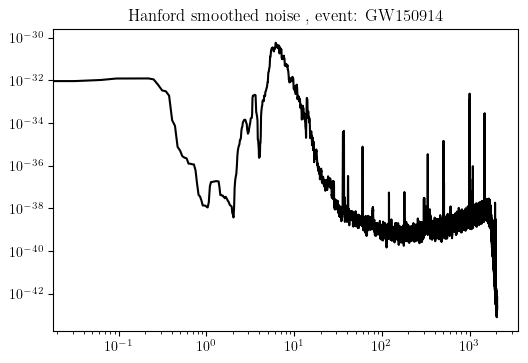

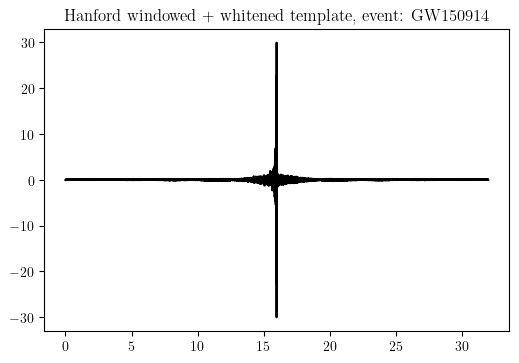

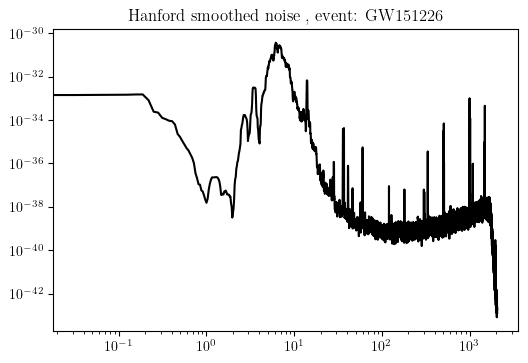

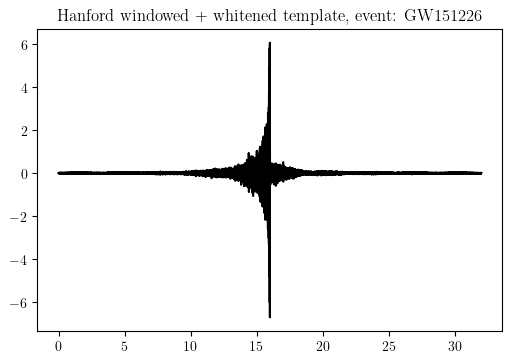

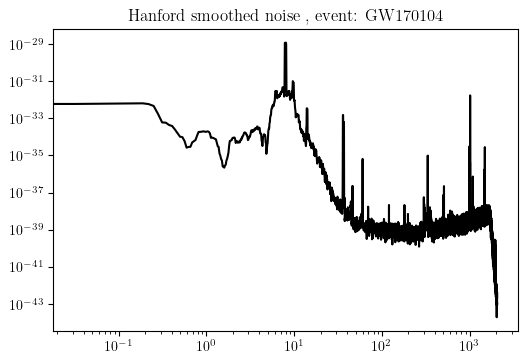

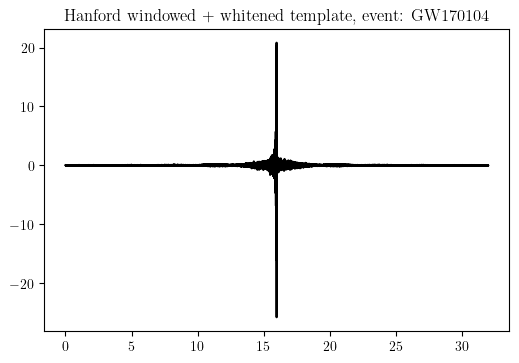

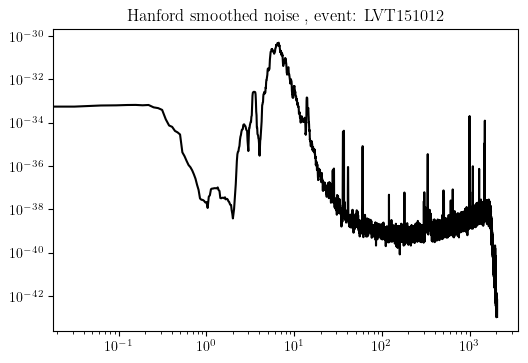

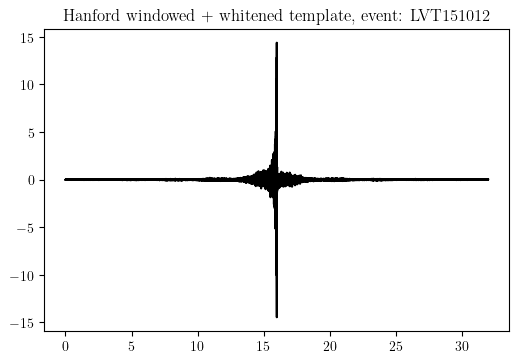

In [71]:
# Hanford detector
whitened_windowed_signal_fft_h=[]
whitened_windowed_template_fft_h=[]

for i in range(4):
    # in json file:
    N=len(signal_h[i])
    x=np.linspace(0,32,N)
    k=np.fft.rfftfreq(np.size(x),1/4096)

    # window function
    window=signal.windows.cosine(N,0.1)
    
    windowed_signal_fft=np.fft.rfft(window*signal_h[i]) # fft of windowed strain
    noise=np.abs(windowed_signal_fft**2) # noise function

    # smoothing out the noise
    noise=np.convolve(noise,np.ones(10)/100,mode='same')

    # whiten ft of signal and windowed template
    whitened_windowed_signal_fft_h.append(windowed_signal_fft/np.sqrt(noise))
    whitened_windowed_template_fft_h.append(np.fft.rfft(template_h[i]*window)/np.sqrt(noise))

    # a) plots of smoothed out noise and windowed + whitened template
    plt.plot(k,noise,'k')
    plt.loglog()
    plt.title('Hanford smoothed noise , event: '+template_title[i])
    plt.show()
    plt.plot(x,np.fft.irfft(whitened_windowed_template_fft_h[i]),'k')
    plt.title('Hanford windowed + whitened template, event: '+template_title[i])
    plt.show()

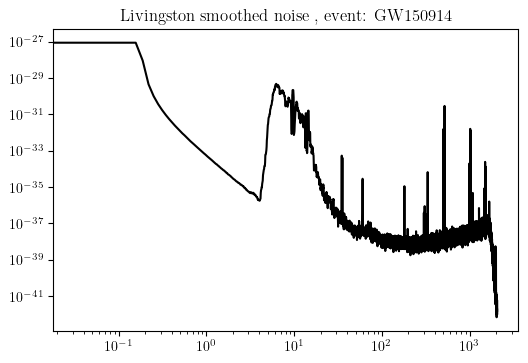

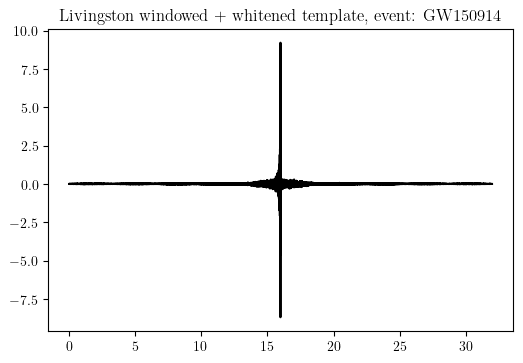

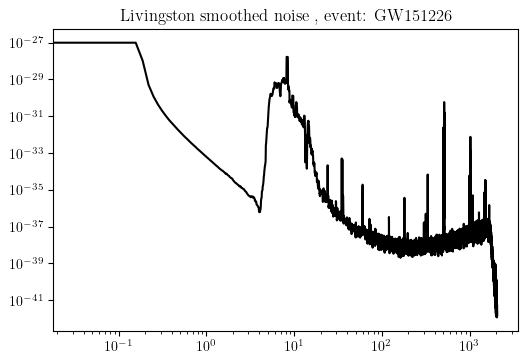

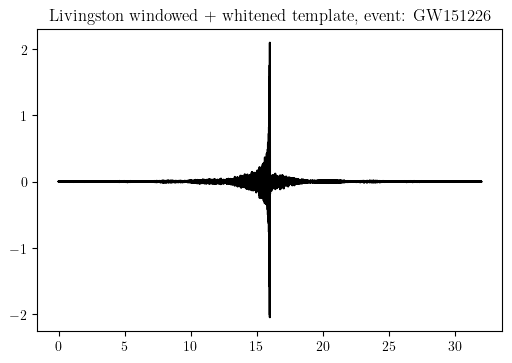

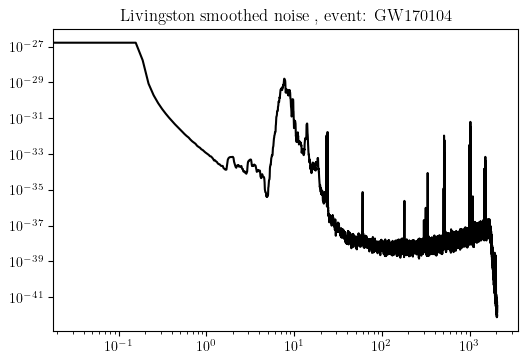

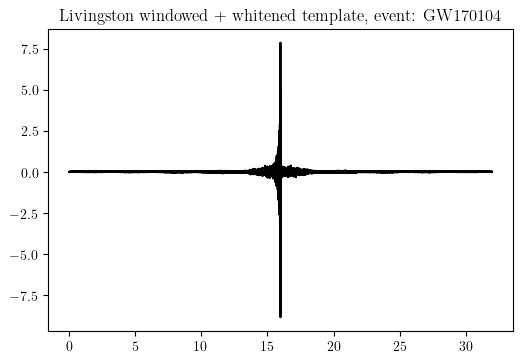

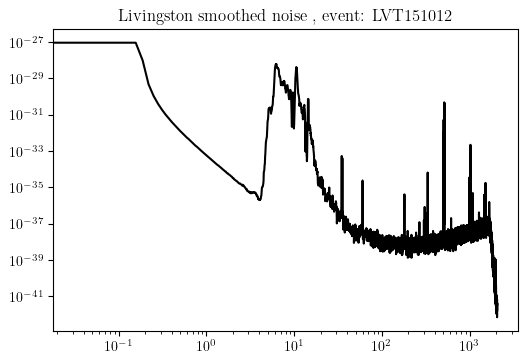

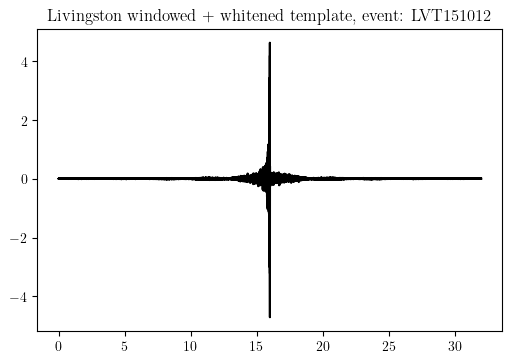

In [72]:
# Livingston detector
whitened_windowed_signal_fft_l=[]
whitened_windowed_template_fft_l=[]

for i in range(4):
    # in json file:
    N=len(signal_l[i])
    x=np.linspace(0,32,N)
    k=np.fft.rfftfreq(np.size(x),1/4096)

    # window function
    window=signal.windows.cosine(N,0.1)
    
    windowed_signal_fft=np.fft.rfft(window*signal_l[i]) # fft of windowed strain
    noise=np.abs(windowed_signal_fft**2) # noise function

    # smoothing out the noise
    noise=np.convolve(noise,np.ones(10)/10,mode='same')

    # whiten ft of signal and windowed template
    whitened_windowed_signal_fft_l.append(windowed_signal_fft/np.sqrt(noise))
    whitened_windowed_template_fft_l.append(np.fft.rfft(template_h[i]*window)/np.sqrt(noise))

    # a) plots of smoothed out noise and windowed + whitened template
    plt.plot(k,noise,'k')
    plt.loglog()
    plt.title('Livingston smoothed noise , event: '+template_title[i])
    plt.show()
    plt.plot(x,np.fft.irfft(whitened_windowed_template_fft_l[i]),'k')
    plt.title('Livingston windowed + whitened template, event: '+template_title[i])
    plt.show()

## b) Matched filters

Now I use match filters to find the four pairs of events 

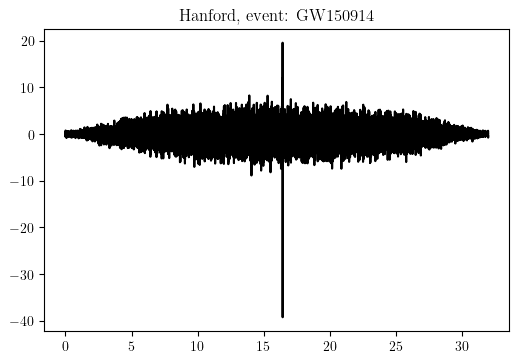

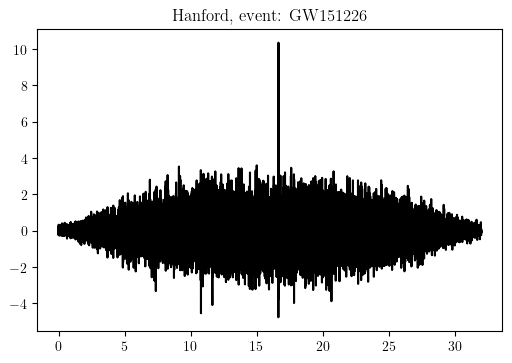

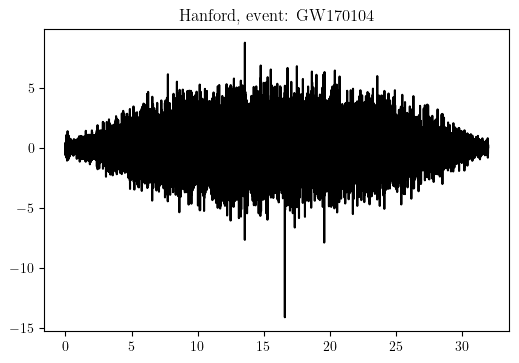

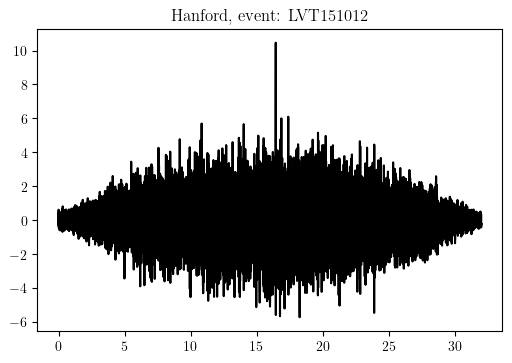

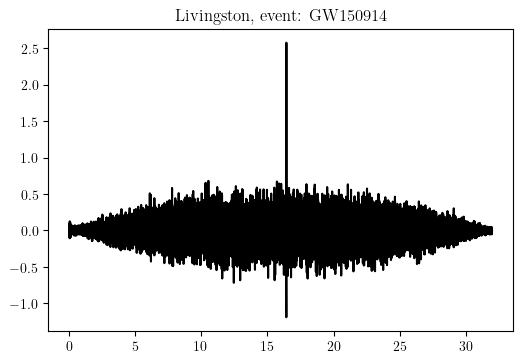

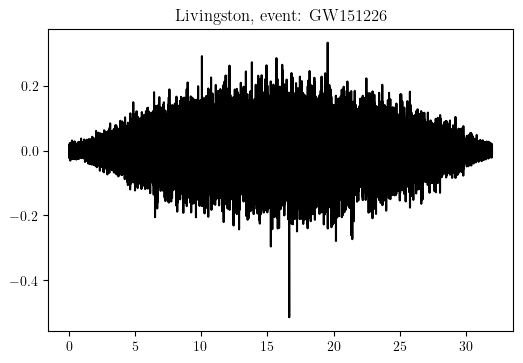

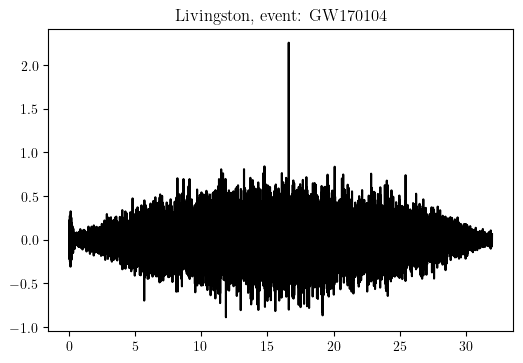

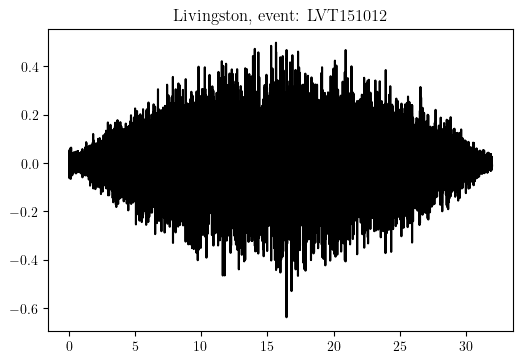

In [73]:
# Hanford detector
h=[]
for i in range(4):
    h.append(np.fft.irfft(whitened_windowed_signal_fft_h[i]*np.conj(whitened_windowed_template_fft_h[i])))
    plt.plot(x,np.fft.fftshift(h[i]),'k')
    plt.title('Hanford, event: '+template_title[i])
    plt.show()

# livingston detector
l=[]
for i in range(4):
    l.append(np.fft.irfft(whitened_windowed_signal_fft_l[i]*np.conj(whitened_windowed_template_fft_l[i])))
    plt.plot(x,np.fft.fftshift(l[i]),'k')
    plt.title('Livingston, event: '+template_title[i])
    plt.show()

Seems like this works, there's a peak at around 16-17 for all events!

## c) Estimating noise for each event

In [74]:
# Noise for Hanford detector
noise_h=[]
# Noise for Livingston detector
noise_l=[]

# combined events
combined=[]
for i in range(len(h)):
    combined.append((h[i]+l[i])/2)

# Noise for Hanford + Livingston combined
noise_combined=[]

for i in range(4):
    noise_h.append(np.std(np.abs(h[i])))
    noise_l.append(np.std(np.abs(l[i])))
    noise_combined.append(np.std(np.abs(combined[i])))
    # printing stuff
    print('For event: '+template_title[i]+', noise estimate for Hanford is: ',noise_h[i],', noise estimate for Livingston is: ', noise_l[i],', noise estimate for combined events is: ', noise_combined[i],'\n')

For event: GW150914, noise estimate for Hanford is:  1.1892205401404303 , noise estimate for Livingston is:  0.10194863698441238 , noise estimate for combined events is:  0.5974629493861626 

For event: GW151226, noise estimate for Hanford is:  0.5407033898239655 , noise estimate for Livingston is:  0.037503712804905366 , noise estimate for combined events is:  0.2704995873840999 

For event: GW170104, noise estimate for Hanford is:  0.965630994246471 , noise estimate for Livingston is:  0.12099916323651749 , noise estimate for combined events is:  0.4867375023635901 

For event: LVT151012, noise estimate for Hanford is:  0.7798511301954579 , noise estimate for Livingston is:  0.06944934815517534 , noise estimate for combined events is:  0.3915015361176727 



## d) Signal to noise ratio (SNR) for each event, scatter in matched filter vs analytical



In [75]:
# scatter in MF SNR
sig_h=[];sig_l=[];sig_c=[]
scatter_h=[];scatter_l=[];scatter_c=[]

for i in range(4):
    sig_h.append(np.max(np.abs(h[i])))
    scatter_h.append(sig_h[i]/noise_h[i])
    sig_l.append(np.max(np.abs(l[i])))
    scatter_l.append(sig_l[i]/noise_l[i])
    sig_c.append(np.max(np.abs(combined[i])))
    scatter_c.append(sig_c[i]/noise_combined[i])


# getting analytical data for combined events
combined_signal=[]
for i in range(len(signal_h)):
    combined_signal.append((signal_h[i]+signal_l[i])/2)
combined_template=[]
for i in range(len(template_h)):
    combined_template.append((template_h[i]+template_l[i])/2)

# getting analytical SNR
whitened_windowed_signal_fft_c=[]
whitened_windowed_template_fft_c=[]
analytical_snr_c=[];analytical_snr_h=[];analytical_snr_l=[]
for i in range(4):
    N=len(combined_signal[i])
    x=np.linspace(0,32,N)
    k=np.fft.rfftfreq(np.size(x),1/4096)

    # window function
    window=signal.windows.cosine(N,0.1)
    
    windowed_signal_fft=np.fft.rfft(window*combined_signal[i]) # fft of windowed strain
    noise=np.abs(windowed_signal_fft**2) # noise function

    # smoothing out the noise
    noise=np.convolve(noise,np.ones(10)/100,mode='same')

    # whiten ft of signal and windowed template
    whitened_windowed_signal_fft_c.append(windowed_signal_fft/np.sqrt(noise))
    whitened_windowed_template_fft_c.append(np.fft.rfft(combined_template[i]*window)/np.sqrt(noise))
    
    # analytical signal, noise and SNR
    analytical_c=(np.fft.irfft(whitened_windowed_signal_fft_c[i]*whitened_windowed_template_fft_c[i]))
    analytical_h=(np.fft.irfft(whitened_windowed_signal_fft_h[i]*whitened_windowed_template_fft_h[i]))
    analytical_l=(np.fft.irfft(whitened_windowed_signal_fft_l[i]*whitened_windowed_template_fft_l[i]))
    analytical_snr_h.append(np.max(np.abs(analytical_h))/(np.std(np.abs(analytical_h))))
    analytical_snr_l.append(np.max(np.abs(analytical_l))/(np.std(np.abs(analytical_l))))
    analytical_snr_c.append(np.max(np.abs(analytical_c))/(np.std(np.abs(analytical_c))))

    # printing stuff
    print('For event: '+template_title[i]+':')
    print('Hanford detector, scatter SNR is: ',scatter_h[i],', analytical SNR is: ',analytical_snr_h[i],',')
    print('Livingston detector, scatter SNR is: ',scatter_l[i],', analytical SNR is: ',analytical_snr_l[i],',')
    print('Combined detector, scatter SNR is: ',scatter_c[i],', analytical SNR is: ',analytical_snr_c[i],',')
    print('\n')


For event: GW150914:
Hanford detector, scatter SNR is:  33.038344496202775 , analytical SNR is:  11.2089206258674 ,
Livingston detector, scatter SNR is:  25.269917222776556 , analytical SNR is:  10.416277055758352 ,
Combined detector, scatter SNR is:  33.0937475445969 , analytical SNR is:  12.360822665194004 ,


For event: GW151226:
Hanford detector, scatter SNR is:  19.146519469172755 , analytical SNR is:  7.658793371334889 ,
Livingston detector, scatter SNR is:  13.69219304466202 , analytical SNR is:  8.078658135979895 ,
Combined detector, scatter SNR is:  18.827364119668914 , analytical SNR is:  8.045792730682273 ,


For event: GW170104:
Hanford detector, scatter SNR is:  14.64774377554891 , analytical SNR is:  7.734767063365932 ,
Livingston detector, scatter SNR is:  18.628745881389534 , analytical SNR is:  8.22285028146778 ,
Combined detector, scatter SNR is:  14.617231079806231 , analytical SNR is:  9.98790887874643 ,


For event: LVT151012:
Hanford detector, scatter SNR is:  13.

Analytical SNR is lower than scatter SNR for all events and all detectors. I don't know why this is the case, or if the way I found the analytical SNR is good.

## e)

In [76]:
# find the frequencies for which half the weight comes from above and the other half comes from below
f_h=[];f_l=[]
# for Hanford detector
for i in range(4):
    # get power spectrum from the results
    power_h=np.fft.rfft(h[i])
    sum_power_h=np.sum(np.abs(power_h));sum_power_l=np.sum(np.abs(power_l));
    for j in range(1,len(k)):
        cum_sum_h=np.sum(np.abs(power_h[:j]))
        # if cumulative sum of power spectrum is close to half of the total sum
        # get the frequencies
        if (sum_power_h/cum_sum_h)/2 <=1:
            f_h.append(k[j])
            break
    
# for Livingston detector
for i in range(4):
    # get power spectrum from the results
    power_l=np.fft.rfft(l[i])
    sum_power_l=np.sum(np.abs(power_l))
    for j in range(1,len(k)):
        cum_sum_l=np.sum(np.abs(power_l[:j]))
        # if cumulative sum of power spectrum is close to half of the total sum
        # get the frequency
        if (sum_power_l/cum_sum_l)/2 <=1:
            f_l.append(k[j])
            break

# printing stuff
for i in range(4):
    print('For event: '+template_title[i])
    print('for Hanford detector the frequency that splits the weights in half is: ',f_h[i])
    print('for Livingston detector the frequency that splits the weights in half is: ',f_l[i])
    print('\n')

For event: GW150914
for Hanford detector the frequency that splits the weights in half is:  124.3125
for Livingston detector the frequency that splits the weights in half is:  133.75


For event: GW151226
for Hanford detector the frequency that splits the weights in half is:  131.28125
for Livingston detector the frequency that splits the weights in half is:  171.65625


For event: GW170104
for Hanford detector the frequency that splits the weights in half is:  125.4375
for Livingston detector the frequency that splits the weights in half is:  113.84375


For event: LVT151012
for Hanford detector the frequency that splits the weights in half is:  113.9375
for Livingston detector the frequency that splits the weights in half is:  129.875




I hope that's good!

## f) (f for finally!)

In [88]:
# finding time of arrival for each event, at both detectors
index_h=[];index_l=[]
for i in range(4):
    # wave is where there is the spike in the results
    index_h.append(np.where(np.abs(np.fft.fftshift(h[i]))==np.max(np.abs(np.fft.fftshift(h[i]))))[0][0])
    index_l.append(np.where(np.abs(np.fft.fftshift(l[i]))==np.max(np.abs(np.fft.fftshift(l[i]))))[0][0])
    # printing stuff
    print('For event: '+template_title[i])
    print('Time of arrival of wave at Hanford detector is: ',index_h[i]*dt_h[i],'seconds.')
    print('Time of arrival of wave at Livingston detector is: ',index_l[i]*dt_l[i], 'seconds.')
    print('\n')

For event: GW150914
Time of arrival of wave at Hanford detector is:  16.4404296875 seconds.
Time of arrival of wave at Livingston detector is:  16.43310546875 seconds.


For event: GW151226
Time of arrival of wave at Hanford detector is:  16.647705078125 seconds.
Time of arrival of wave at Livingston detector is:  16.646484375 seconds.


For event: GW170104
Time of arrival of wave at Hanford detector is:  16.60791015625 seconds.
Time of arrival of wave at Livingston detector is:  16.611083984375 seconds.


For event: LVT151012
Time of arrival of wave at Hanford detector is:  16.44140625 seconds.
Time of arrival of wave at Livingston detector is:  16.44189453125 seconds.




Assuming that the detectors that are separated by a few thousand kilometers, there is a positional uncertainty $\Delta L$ that is equal to 

$$ \Delta L = c\Delta t,$$

where $\Delta t$ is the time difference between the events at the two detectors.

In [90]:
# find positional uncertainty
c=3e8 # speed of light 

# time difference
dt=[]
for i in range(4):
    dt.append(np.abs(index_h[i]*dt_h[i]-index_l[i]*dt_l[i]))

# positional uncertainty
L=[]
for i in range(4):
    L.append(c*dt[i])
    print('For event: '+template_title[i]+', positional uncertainty is: ',L[i], 'meters.')


For event: GW150914, positional uncertainty is:  2197265.625 meters.
For event: GW151226, positional uncertainty is:  366210.9375 meters.
For event: GW170104, positional uncertainty is:  952148.4375 meters.
For event: LVT151012, positional uncertainty is:  146484.375 meters.


This is huge!